# World Happiness Report

The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Content:

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

We need to predict the happiness score considering all the other factors mentioned in the dataset. 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.shape

(158, 12)

# Checking for Missing Data

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

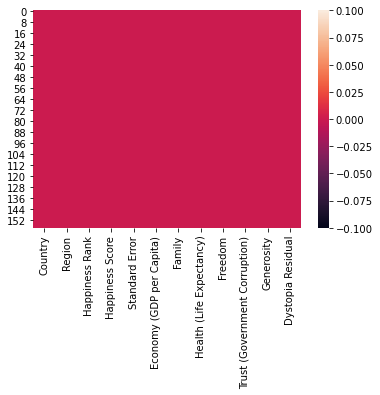

In [6]:
sns.heatmap(df.isnull())

There is no missing data in this dataset.

# Visualization of dataset:

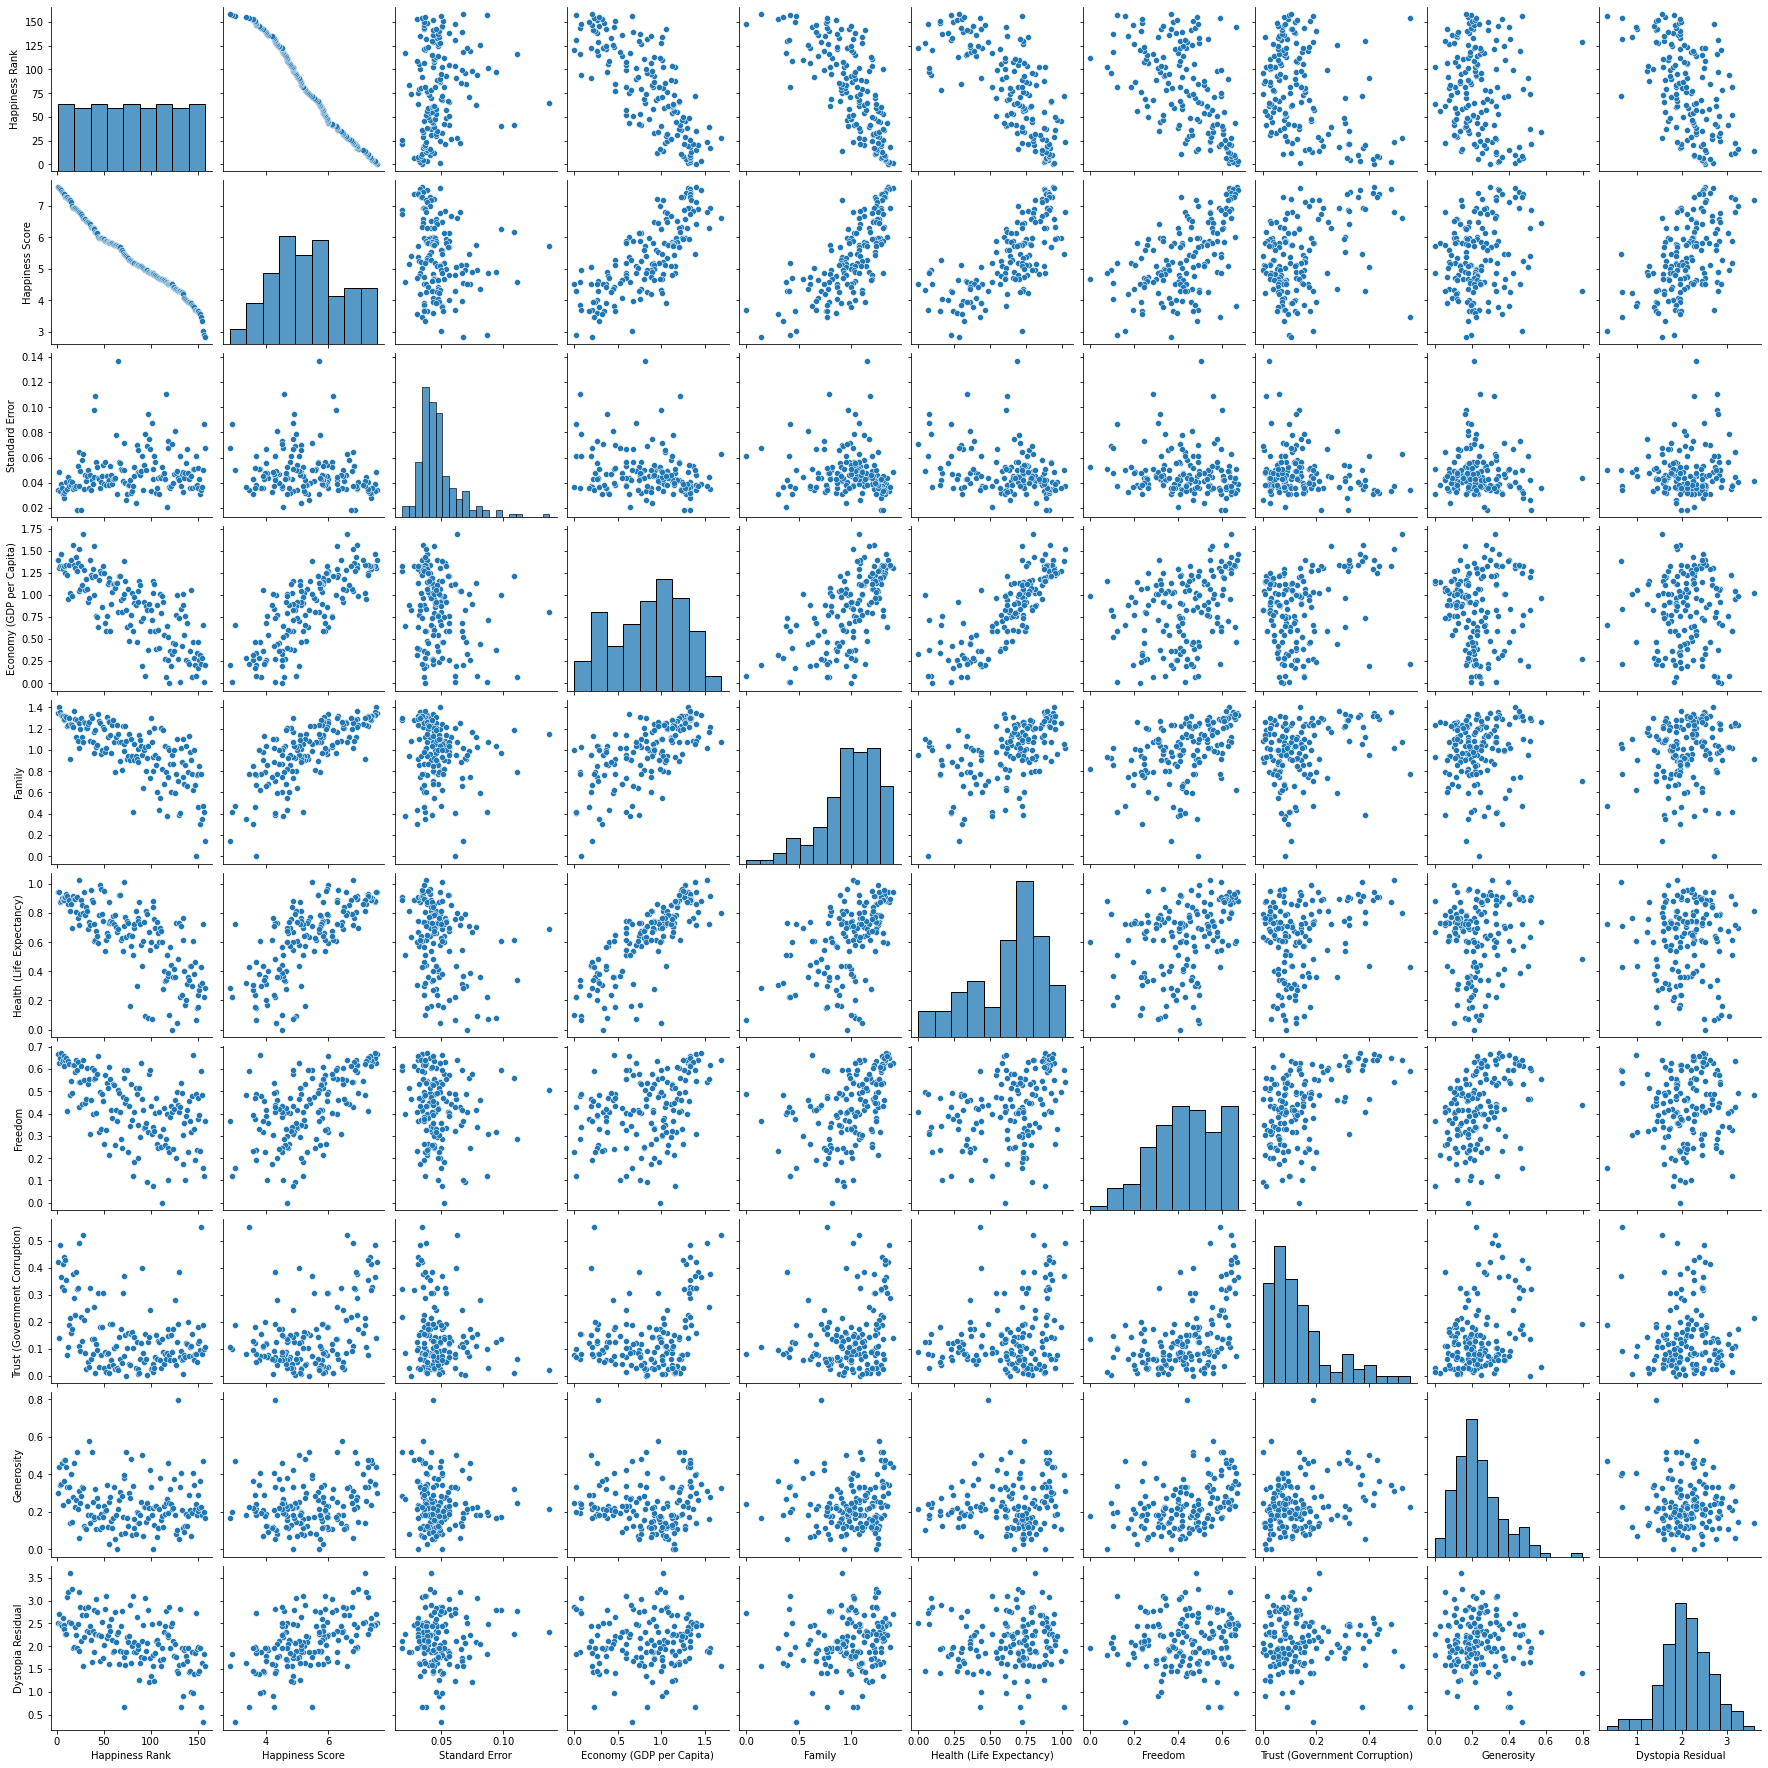

In [7]:
sns.pairplot(df)

<AxesSubplot:xlabel='Country', ylabel='Economy (GDP per Capita)'>

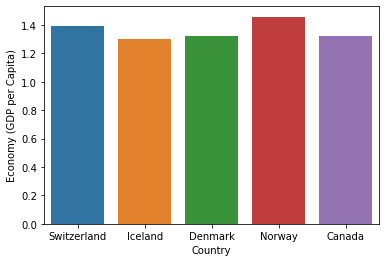

In [8]:
sns.barplot(x=df['Country'].head(5), y = df['Economy (GDP per Capita)'],data=df)

Checking for top 5 countries having good Economy (GDP per Capita).

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

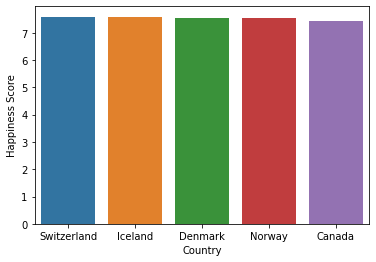

In [9]:
sns.barplot(x=df['Country'].head(5),y=df['Happiness Score'],data=df)

Checking for top 5 countries having good 'Happiness Score'.

In [10]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

As we can observe in this dataset, two columns i.e Country and Region are Categorical data,
So, it need to get encoded to numerical data

In [11]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['Country'] = lbl.fit_transform(df['Country'])
df['Region'] = lbl.fit_transform(df['Region'])

In [12]:
df['Country']

0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Name: Country, Length: 158, dtype: int32

In [13]:
df['Region']

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Name: Region, Length: 158, dtype: int32

In [14]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Correlation

In [15]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


Correlation using Heatmap:

<AxesSubplot:>

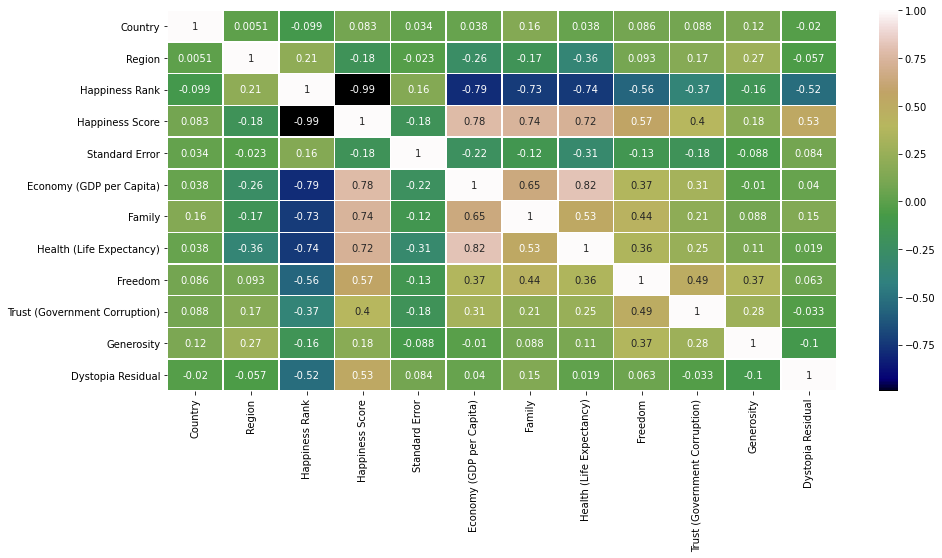

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5,cmap ='gist_earth')

# Outcome of Correlation

As we can observe from the above heatmap of correlations, there is a high correlation between –

Happiness Score – Economy (GDP per Capita) = 0.78\
Happiness Score – Family = 0.74\
Happiness Score – Health (Life Expectancy) = 0.72\
Economy (GDP per Capita) – Health (Life Expectancy) = 0.82

# Describing Datasets:

In [17]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


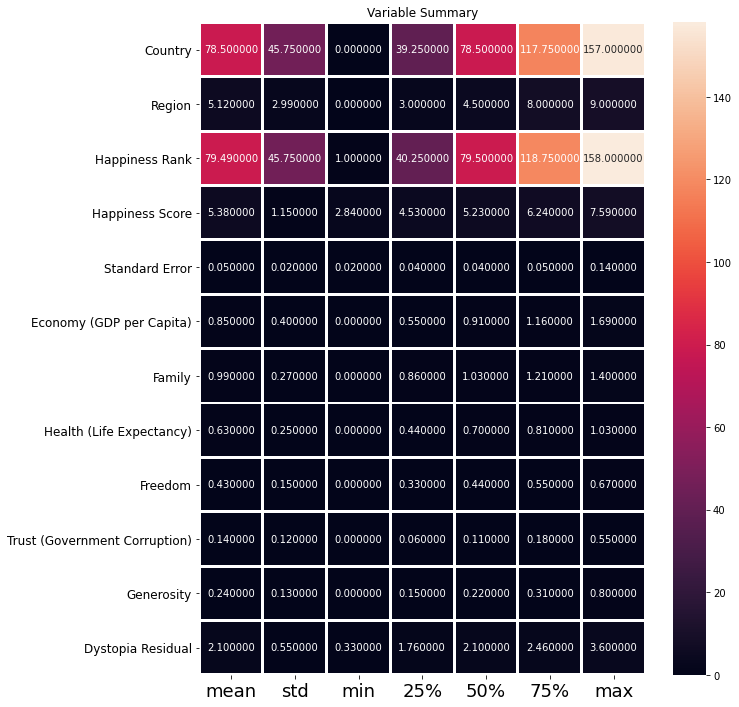

In [18]:
plt.figure(figsize=(10,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2, annot = True, fmt = 'f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

# Checking for Outliers

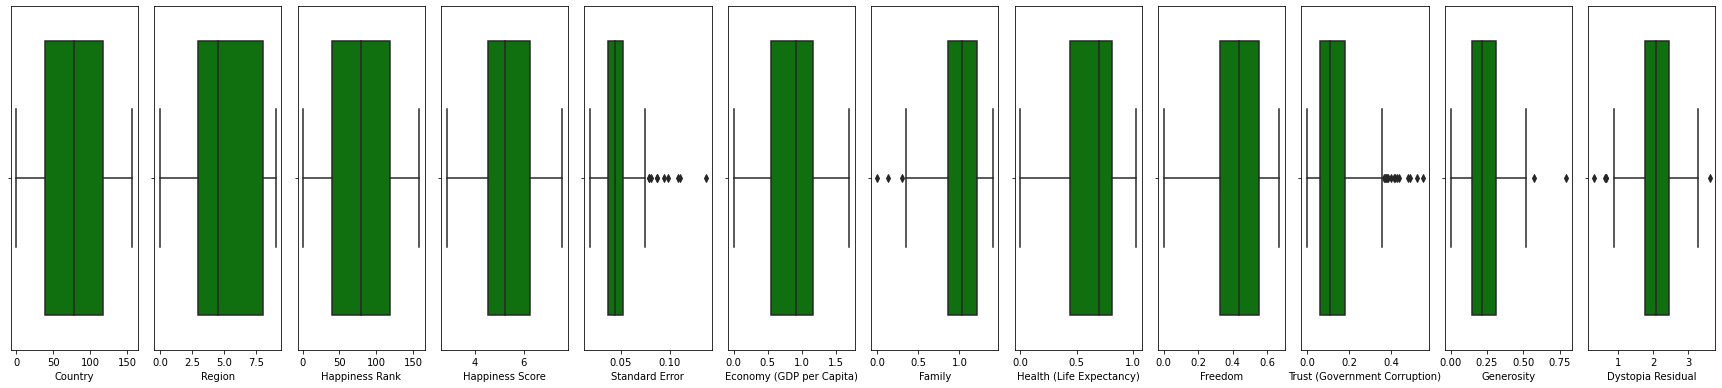

In [19]:
col_list = df.columns.values
ncol = 15
nrows = 15
plt.figure(figsize=(30,80))
for i in range(0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[col_list[i]],color = 'green', orient='h')
    plt.tight_layout()

From the above Outcome,we can see that columns["Country", "Region", "Happiness Rank", "Happiness Score","Economy (GDP per Capita)","Health (Life Expectancy)" and "Freedom"] has no outliers.\
Whereas, columns ["Standard Error", "Family", "Trust (Government Corruption)", "Generosity" and "Dystopia Residual"] found to have Outliers.


# Skewness

In [20]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Outcome of the skewness:\
Skewness threshold is taken as +/-0.65.\
Columns having skewness are:-\
        Standard Error\
        Economy (GDP per Capita)\
        Family\
        Generosity       

# Normal Distribution Curve:

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

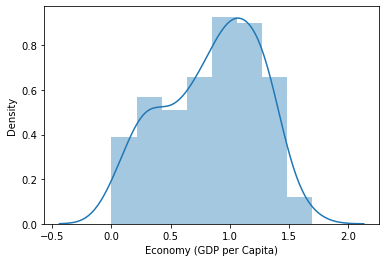

In [21]:
sns.distplot(df['Economy (GDP per Capita)'])

The Data of the Column "Economy (GDP per Capita)" is not normalised. The building blocks is out of normalised curve.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

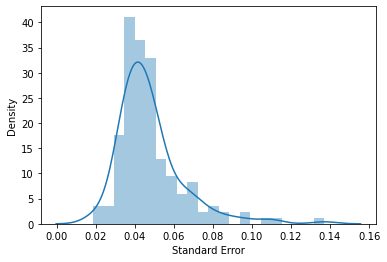

In [22]:
sns.distplot(df['Standard Error'])

The Data of the Column "Standard Error" is not normalised. The building blocks is out of normalised curve.

<AxesSubplot:xlabel='Family', ylabel='Density'>

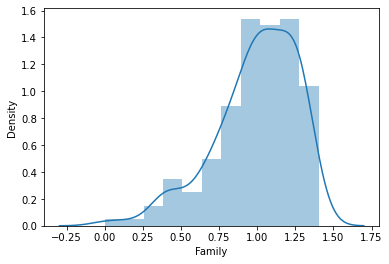

In [23]:
sns.distplot(df['Family'])

The Data of the Column "Family" is not normalised. The building blocks is out of normalised curve.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

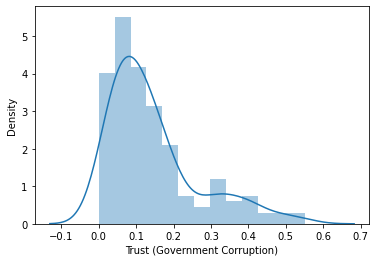

In [24]:
sns.distplot(df['Trust (Government Corruption)'])

The Data of the Column "Trust (Government Corruption)" is not normalised. The building blocks is out of normalised curve.

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

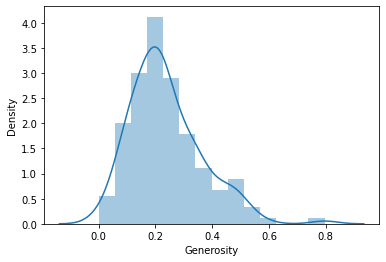

In [25]:
sns.distplot(df['Generosity'])

The Data of the Column "Generosity" is not normalised. The building blocks is out of normalised curve.

# Data Cleaning:

In [26]:
delete = pd.DataFrame([["-0.177254","Standard Error","No", "Alot"],["0.395199","Trust (Government Corruption)","No","Alot"]],columns = ["Correlation with Target","Column_Name","Normalised","Outliers"])
delete

,Correlation with Target,Column_Name,Normalised,Outliers
0,-0.177254,Standard Error,No,Alot
1,0.395199,Trust (Government Corruption),No,Alot


In [27]:
df = df.drop(["Standard Error","Trust (Government Corruption)"],axis=1)
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,135,9,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,58,9,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
2,37,9,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204
3,105,9,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,24,5,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.67042
154,13,8,155,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,1.63328
155,136,4,156,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.32858
156,21,8,157,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,1.83302


# Removing Outliers

Z-Score Technique:

In [28]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
z.shape

(158, 10)

In [29]:
threshold = 3
print(np.where(z>3))

(array([128, 147, 155, 157], dtype=int64), array([8, 5, 9, 5], dtype=int64))


In [30]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(158, 10)
(154, 10)


# Percentage Data Loss

In [31]:
loss_percent = (158-154)/158*100
print(loss_percent)

2.5316455696202533


Dividing data in features and labels:

In [32]:
x = df_new.iloc[:,[0,1,2,4,5,6,7,8,9]] # considering all features except the independent variable
x

,Country,Region,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,135,9,1,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,58,9,2,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
2,37,9,3,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204
3,105,9,4,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,24,5,5,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
151,20,8,152,0.25812,0.85188,0.27125,0.39493,0.21747,1.46494
152,0,7,153,0.31982,0.30285,0.30335,0.23414,0.36510,1.95210
153,118,8,154,0.22208,0.77370,0.42864,0.59201,0.22628,0.67042
154,13,8,155,0.28665,0.35386,0.31910,0.48450,0.18260,1.63328


In [33]:
x.shape

(154, 9)

In [34]:
x.shape[1]

9

In [35]:
y = df_new.iloc[:,-1]
y

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
151    1.46494
152    1.95210
153    0.67042
154    1.63328
156    1.83302
Name: Dystopia Residual, Length: 154, dtype: float64

# Checking for Multi-Colinearity

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(X):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features'] = x.columns
    return vif

In [37]:
x = df_new.iloc[:,[0,1,2,4,5,6,7,8,9]]

In [38]:
vif_cal(x)

,VIF Factor,Features
0,4.156033,Country
1,5.294697,Region
2,3.760706,Happiness Rank
3,24.099065,Economy (GDP per Capita)
4,31.292371,Family
5,25.546095,Health (Life Expectancy)
6,14.997626,Freedom
7,7.017772,Generosity
8,11.881004,Dystopia Residual


From the above outcome, we can state that Family, Freedom,Economy (GDP per Capita) and Health (Life Expectancy) has high VIF value.
So we can drop Family and Freedom column and Region column as Economy and Health has a good correlation with the independent variable.

In [39]:
df_new.drop(['Family','Freedom','Region'],axis=1,inplace=True)

In [40]:
df_new

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Generosity,Dystopia Residual
0,135,1,7.587,1.39651,0.94143,0.29678,2.51738
1,58,2,7.561,1.30232,0.94784,0.43630,2.70201
2,37,3,7.527,1.32548,0.87464,0.34139,2.49204
3,105,4,7.522,1.45900,0.88521,0.34699,2.46531
4,24,5,7.427,1.32629,0.90563,0.45811,2.45176
...,...,...,...,...,...,...,...
151,20,152,3.587,0.25812,0.27125,0.21747,1.46494
152,0,153,3.575,0.31982,0.30335,0.36510,1.95210
153,118,154,3.465,0.22208,0.42864,0.22628,0.67042
154,13,155,3.340,0.28665,0.31910,0.18260,1.63328


# Transforming data to remove skewness:

In [41]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method = 'yeo-johnson')
x

array([[ 1.18347223,  1.24184395, -2.06731969, ...,  1.74239091,
         0.6507088 ,  0.75090313],
       [-0.33137075,  1.24184395, -2.01009206, ...,  1.42567841,
         1.57559817,  1.10923367],
       [-0.83374583,  1.24184395, -1.95822375, ...,  1.60162352,
         0.97480258,  0.702018  ],
       ...,
       [ 0.87719674,  0.96010996,  1.54167355, ...,  1.12082103,
         0.07244231, -2.58781554],
       [-1.52983879,  0.96010996,  1.55900829, ...,  0.29366535,
        -0.33327907, -0.90879971],
       [-1.27453832,  0.96010996,  1.59358194, ..., -1.85367046,
        -0.19255125, -0.54256783]])

# Standard Scaling:

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.18347223,  1.24184395, -2.06731969, ...,  1.74239091,
         0.6507088 ,  0.75090313],
       [-0.33137075,  1.24184395, -2.01009206, ...,  1.42567841,
         1.57559817,  1.10923367],
       [-0.83374583,  1.24184395, -1.95822375, ...,  1.60162352,
         0.97480258,  0.702018  ],
       ...,
       [ 0.87719674,  0.96010996,  1.54167355, ...,  1.12082103,
         0.07244231, -2.58781554],
       [-1.52983879,  0.96010996,  1.55900829, ...,  0.29366535,
        -0.33327907, -0.90879971],
       [-1.27453832,  0.96010996,  1.59358194, ..., -1.85367046,
        -0.19255125, -0.54256783]])

# Checking the relation of columns with the Target Column

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

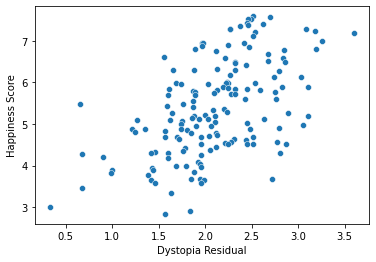

In [43]:
sns.scatterplot(x= 'Dystopia Residual',y = 'Happiness Score',data = df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

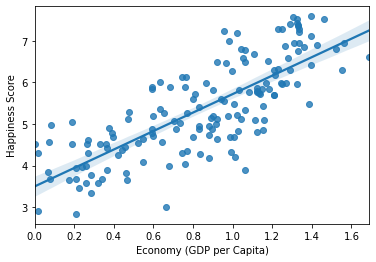

In [44]:
sns.regplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', data = df)

And as we can see, as the Economy increases, the Happiness Score increases as well as denoting a positive relation.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

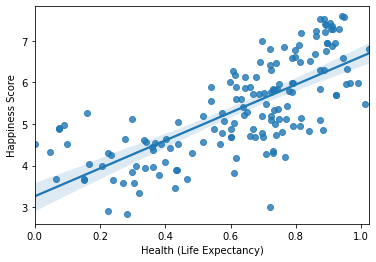

In [45]:
sns.regplot(x = 'Health (Life Expectancy)', y = 'Happiness Score', data = df)

And by visualizing the relation between Health(Life Expectancy) and Happiness Score,
we can conclude that Happiness is dependent on health, i.e. Good Health is equal to More Happy a person is.


# As we can see, there is a kind of linear relation between our Features and Labels, we will use Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr_model = LinearRegression()

# Splitting the Dataset

In [47]:
max_score = 0
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size=0.30)
    lr_model.fit(x_train,y_train)
    pred_test = lr_model.predict(x_test)
    r2_scr = r2_score(y_test,pred_test)
    if r2_scr > max_score:
        max_score = r2_scr
        final_r2_state = i
print("Max r2 score corresponding to", final_r2_state, "is", max_score)

Max r2 score corresponding to 279 is 0.999636460347157


In [48]:
#lets use cross validation to check overfiting or underfitting
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([0.99778036, 0.99925927, 0.99876946, 0.99939894, 0.99599114])

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 279,test_size=.30)
lr_model.fit(x_train,y_train)
pred_test = lr_model.predict(x_test)
pred_test
print("RMSE :", np.sqrt(mean_squared_error(y_test,pred_test)))

print("r2_score :",r2_score(y_test,pred_test))

RMSE : 0.009844853074809595
r2_score : 0.999636460347157


# Approaching more regressors

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [51]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred_test = m.predict(x_test)
    print("r2_score of",m, ":",r2_score(y_test,pred_test))
    print('mean_squared_error',mean_squared_error(y_test,pred_test))
    print('mean_absolute_error',mean_absolute_error(y_test,pred_test))
    print('\n')

r2_score of RandomForestRegressor() : 0.9978040057532063
mean_squared_error 0.0005854608891825441
mean_absolute_error 0.015344387234042562


r2_score of SVR() : 0.941672900684001
mean_squared_error 0.015550239022184319
mean_absolute_error 0.10123857812273293


r2_score of DecisionTreeRegressor() : 0.9700107156090263
mean_squared_error 0.00799526370851064
mean_absolute_error 0.050419361702127685


r2_score of AdaBoostRegressor() : 0.9942060200221956
mean_squared_error 0.0015446983409287203
mean_absolute_error 0.029823518438932984




# Saving the best model

As all models are performing good for this dataset, we can choose LinearRegression model.

In [52]:
import joblib

joblib.dump(lr_model,'lrmodel.obj')


['lrmodel.obj']

In [53]:
lrloadmodel = joblib.load('lrmodel.obj')

# Conclusion

In [54]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lrloadmodel.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,2.84848,2.856284
1,1.44395,1.447349
2,2.67782,2.679508
3,2.53320,2.529609
4,2.24639,2.242999
5,2.51009,2.505425
6,1.57059,1.568565
7,1.99172,1.979099
8,2.51011,2.508621
9,1.42766,1.430193
